# Importing the required Libraries

In [1]:
# Importing libraries used for handling download and file management
import requests
import os
import shutil

# Importing libraries used for Data manipulation and analysis
import pandas as pd
import numpy as np

# Importing libraries used for creating data visualizations and plots
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset into a dataframe


To ensure organized data management, it is essential to store data in a designated subfolder. My data is stored in a folder named `data.` You can easily access and download the data from the following link: [Data Download Link](https://drive.google.com/u/0/uc?id=1AUp3Ako4qp65fMqCQ0IKMgWk7R5vxh-j&export=download).

**Note:** The data is stored in a zip file and will need to be unzipped before use.

This structured approach not only promotes efficient data handling but also facilitates easy retrieval and sharing when needed.

The data includes:

| Variable      | Definition                                           |
|---------------|------------------------------------------------------|
| areatype      | The area type in which the house is located.         |
| availability  | The date when the house will be available.           |
| location      | The place where the house is located.                |
| size          | The size of the house.                               |
| society       | The society in which the house is located.           |
| total_sqft    | The area of the house.                               |
| bath          | The number of bathrooms in the house.                |
| balcony       | The number of balconies in the house.                |
| Balance       | Amount of money in the customer's account balance.   |
| price         | The price of the house in thousands.                 |


In [2]:
def download_file(url, destination):
    response = requests.get(url, stream=True)
    parent_dir = "/".join(destination.split("/")[:-1])
    if not os.path.isdir(parent_dir):
      os.mkdir(parent_dir)
    if response.status_code == 200 and not os.path.isfile(destination):
        with open(destination, 'wb') as file:
            for chunk in response.iter_content(1024):
                file.write(chunk)
        print(f"File downloaded to {destination}")
    elif os.path.isfile(destination):
        print(f"File already downloaded")
    else:
        print(f"Failed to download the file")
    return parent_dir

def unzip_file(zip_file_path, extract_to_path):
    try:
        shutil.unpack_archive(zip_file_path, extract_to_path)
        print(f"Successfully extracted files from {zip_file_path}")
    except FileNotFoundError:
        print(f"Error: The ZIP file {zip_file_path} does not exist.")
    except shutil.ReadError:
        print(f"Error: {zip_file_path} is not a valid ZIP archive.")


In [3]:
# To download the file directly from the web.
download = True

if download:
    url = "https://drive.google.com/u/0/uc?id=1AUp3Ako4qp65fMqCQ0IKMgWk7R5vxh-j&export=download"
    destination = "./data/House Price.zip"

    data_directory = download_file(url, destination)


    unzip_file(destination, data_directory)

House_Prices = pd.read_csv("./data/BHP.csv")

File downloaded to ./data/House Price.zip
Successfully extracted files from ./data/House Price.zip


# Data Exploration
First let's look at the **First 5 rows** of our dataframe.

In [4]:
House_Prices.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


Then let's look at the **Last 5 rows** of the DataFrame

In [5]:
House_Prices.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


By just looking at the data, we can see that it has some quality issues, but
let's continue our exploration and examine some general information about the
table.


In [6]:
House_Prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


The dataset has a lot of null values. Asides that some of the columns appear to be in the incorrect datatypes.These dataset needs to undergo data cleaning during the preprocessing stage. This will facilitate a smoother analysis and model creation process. Asides that all the columns appear to be in their correct datatypes which is great!<br>
Now, let's check for redundancies in the dataset<br>

In [7]:
# Checking for redundant rows by counting the number of duplicated rows in the Dataset.
print(sum(House_Prices.duplicated()), "redundant rows")

# Checking for redundant columns by counting the number of duplicated columns in the dataframe.
print(sum(House_Prices.T.duplicated()), "redundant columns")

529 redundant rows
0 redundant columns


To ensure a thorough and accurate analysis, it is essential to address the presence of redundant rows in the dataset. These redundant rows should be identified and removed as part of our data preprocessing steps.

Let's generate a statistical summary of the columns in the dataframe to better understand our data.


In [8]:
# Generating a statistical summary of the numerical columns in the dataset
House_Prices.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [9]:
# Generating a statistical summary of the non-numerical columns in the dataset
House_Prices.describe(include='object')

,area_type,availability,location,size,society,total_sqft
count,13320,13320,13319,13304,7818,13320
unique,4,81,1305,31,2688,2117
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200
freq,8790,10581,540,5199,80,843


This statistical summary offers valuable insights into the dataset. Furthermore, it underscores the importance of further investigation into specific columns, such as `total_sqft` and `size`, as they appear to have incorrect data types.

Before we proceed with data cleaning, let's take a closer look at the categorical columns since they appear to be quite interesting. Let's start with the `area_type` column.

In [10]:
# Checking the unique values in the area_type column
House_Prices.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

Now that we've examined the data and addressed any issues observed, let's shift our focus to the `availability` column.

In [11]:
# Checking the unique values in the availability column
House_Prices.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

It's alarming that this column needs to be split into two separate columns: `vailability` and `Month`. Now, let's shift our gaze to the `location` and `society` columns.


In [12]:
# Checking the unique values in the location column
print(House_Prices.location.unique()[:20])

# Checking the unique values in the society column
print(House_Prices.society.unique()[:20])

['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli'
 'Lingadheeranahalli' 'Kothanur' 'Whitefield' 'Old Airport Road'
 'Rajaji Nagar' 'Marathahalli' 'Gandhi Bazar' '7th Phase JP Nagar'
 'Gottigere' 'Sarjapur' 'Mysore Road' 'Bisuvanahalli'
 'Raja Rajeshwari Nagar' 'Ramakrishnappa Layout' 'Manayata Tech Park'
 'Kengeri' 'Binny Pete']
['Coomee ' 'Theanmp' nan 'Soiewre' 'DuenaTa' 'Jaades ' 'Brway G' 'Prrry M'
 'Shncyes' 'Skityer' 'PrntaEn' 'Prityel' 'GrrvaGr' 'PeBayle' 'She 2rk'
 'Soitya ' 'Bhe 2ko' 'Itelaa ' 'ViistLa' 'KBityo ']


While observing the data, it's evident that the `society` column contains null values and may primarily serve as an identifier. However, at this stage, we aren't certain so let's proceed with the data cleaning process.


# Data Cleaning

After gaining a preliminary understanding of our dataset, it's time to proceed with the data cleaning process.

During our data exploration, we identified several areas that require immediate attention:

1. Removing unnecessary text from the `size` column.
2. Splitting the `availability` column into two columns
3. Handling null values.
4. Converting columns such as `total_sqft` and `size` to their correct data types.
5. Removing redundant rows from the dataset.

Now, let's address these issues and proceed with the data cleaning process.

**1. Removing unnecessary text from the `size` column.**

To make the numerical column `size` usable, we need to remove any unnecessary text from the column.


In [13]:
# Extracting the numerical characters from the size column.
House_Prices['size'] = House_Prices['size'].str.extract('(\d+)')

# checking if the changes have been implemented.
House_Prices['size'].head()

0    2
1    4
2    3
3    3
4    2
Name: size, dtype: object

Let's now get to the next issue now that these has been taken care of.<br>

**2. Splitting the `availability` column into two columns**<br>
The availability column typically contains information about the date when a house or property will be available for purchase or occupancy. It contains two categories of data and will therefore have to be split into 2 columns.
- The first column, `Home_availability`, should be categorical and should contain one of three values, which are `Ready To Move`, `Immediate Possession` and `Date Given.`
- The second column, `Home_availabilty_month` will also be categorical and should contain all the months of the year.

In [14]:
# converting the `availability` column into a categorical column.
House_Prices['Home_availability'] = House_Prices['availability'].apply(lambda x: 'Date Given' if not
 (x == 'Ready To Move' or x == 'Immediate Possession') else x)

# checking if the changes have been implemented.
House_Prices['Home_availability'].unique()

array(['Date Given', 'Ready To Move', 'Immediate Possession'],
      dtype=object)

Now, let's proceed to create the next column. This column will contain the months, and for the rows without a date given, they will be assigned the default value `Tbd,` which stands for `To be determined.`

In [15]:
# converting the `availability` column into a categorical column containing the months of the year.
House_Prices['Home_availabilty_month'] = House_Prices['availability'].str.extract(r'\s*-\s*(\w+)').fillna("Tbd")

# checking if the changes have been implemented.
House_Prices['Home_availabilty_month'].unique()

array(['Dec', 'Tbd', 'May', 'Feb', 'Nov', 'Oct', 'Sep', 'Mar', 'Apr',
       'Aug', 'Jun', 'Jan', 'Jul'], dtype=object)

Before we proceed we have to delete the availability column as it is no longer of any significance to us.

In [16]:
House_Prices = House_Prices.drop(columns='availability')
House_Prices.columns

Index(['area_type', 'location', 'size', 'society', 'total_sqft', 'bath',
       'balcony', 'price', 'Home_availability', 'Home_availabilty_month'],
      dtype='object')

**3. Handling null values.**

For numerical columns, we use the mode of the column as the fill value.<br>
For the categorical columns, such as `society`, we will have to fill them in carefully as they are more sensitive.

In [17]:
# Filling in the missing values in the `Size` column with its mode
House_Prices['size'] = House_Prices['size'].fillna(House_Prices['size'].mode()[0])

# Filling in the missing values in the `Bath` column with its mode
House_Prices['bath'] = House_Prices['bath'].fillna(House_Prices['bath'].mode()[0])

# Filling in the missing values in the `Balcony` column with its mode
House_Prices['balcony'] = House_Prices['balcony'].fillna(House_Prices['balcony'].mode()[0])

# Filling in the missing values in the `location` column with its mode
House_Prices['location'] = House_Prices['location'].fillna(House_Prices['location'].mode()[0])

# Filling in the missing values in the `location` column with its mode
House_Prices['location'] = House_Prices['location'].fillna(House_Prices['location'].mode()[0])

# checking if changes have been implemented
House_Prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   area_type               13320 non-null  object 
 1   location                13320 non-null  object 
 2   size                    13320 non-null  object 
 3   society                 7818 non-null   object 
 4   total_sqft              13320 non-null  object 
 5   bath                    13320 non-null  float64
 6   balcony                 13320 non-null  float64
 7   price                   13320 non-null  float64
 8   Home_availability       13320 non-null  object 
 9   Home_availabilty_month  13320 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.0+ MB


The `society` column contains lengthy text and cannot be effectively imputed due to its substantial volume. Consequently, we will need to consider removing this column from the dataset.

In [18]:
House_Prices = House_Prices.drop(columns='society')

# Checking to see if changes have been implemented
House_Prices.head()

,area_type,location,size,total_sqft,bath,balcony,price,Home_availability,Home_availabilty_month
0,Super built-up Area,Electronic City Phase II,2,1056,2.0,1.0,39.07,Date Given,Dec
1,Plot Area,Chikka Tirupathi,4,2600,5.0,3.0,120.00,Ready To Move,Tbd
2,Built-up Area,Uttarahalli,3,1440,2.0,3.0,62.00,Ready To Move,Tbd
3,Super built-up Area,Lingadheeranahalli,3,1521,3.0,1.0,95.00,Ready To Move,Tbd
4,Super built-up Area,Kothanur,2,1200,2.0,1.0,51.00,Ready To Move,Tbd


Now that we've addressed the previous issues, let's move on to the next challenge.

**4. Converting columns such as `total_sqft` and `size` to their correct data types**<br>
The `total_sqft` and `size` columns currently have incorrect data types, necessitating conversion for practical utilization.<br>
Let's start with the `size` column.

In [19]:
# Converting columns such as total_sqft and size to their correct data types
House_Prices['total_sqft'] = House_Prices['total_sqft'].str.extract('(\d+)').astype(int)
House_Prices['size'] = House_Prices['size'].astype(int)

# Checking to see if changes have been implemented
House_Prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   area_type               13320 non-null  object 
 1   location                13320 non-null  object 
 2   size                    13320 non-null  int64  
 3   total_sqft              13320 non-null  int64  
 4   bath                    13320 non-null  float64
 5   balcony                 13320 non-null  float64
 6   price                   13320 non-null  float64
 7   Home_availability       13320 non-null  object 
 8   Home_availabilty_month  13320 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 936.7+ KB


Now for the final step in the cleaning process.

**5 Removing redundant rows from the dataset.**<br>
We have to remove the redundant rows as they might affect our analysis.

In [20]:
# Removing the redundant rows.
House_Prices = House_Prices.drop_duplicates()

# Checking if the change have been correctly implemented
print(sum(House_Prices.duplicated()), "redundant rows")

0 redundant rows


After implementing the changes, we should move on to the next section, which focuses on data visualization. However, before we proceed, it's essential to review our cleaned dataset.

In [21]:
House_Prices.head()

,area_type,location,size,total_sqft,bath,balcony,price,Home_availability,Home_availabilty_month
0,Super built-up Area,Electronic City Phase II,2,1056,2.0,1.0,39.07,Date Given,Dec
1,Plot Area,Chikka Tirupathi,4,2600,5.0,3.0,120.00,Ready To Move,Tbd
2,Built-up Area,Uttarahalli,3,1440,2.0,3.0,62.00,Ready To Move,Tbd
3,Super built-up Area,Lingadheeranahalli,3,1521,3.0,1.0,95.00,Ready To Move,Tbd
4,Super built-up Area,Kothanur,2,1200,2.0,1.0,51.00,Ready To Move,Tbd


# Data Visualization

Let's first create a function for the labelling of our graphs

In [22]:
def labelling(data, text=True, save=False, figsize=(6, 4), dpi=120, kind="bar", title="", y="", x='',
              draw=True):
    if draw:
      plt.figure(figsize=figsize, dpi=dpi)
      data.plot(kind=kind)
    if text:
        for index, value in enumerate(data):
            plt.text(index, value, str(value), ha='center', va='bottom')
    if save:
        plt.savefig('./viz/sample_plot_1.png', dpi=300, bbox_inches='tight')
    plt.title(title.title())
    plt.ylabel(y.title())
    plt.xlabel(x.title())


Let's begin by analyzing the distribution of house prices to gain a better understanding of it.

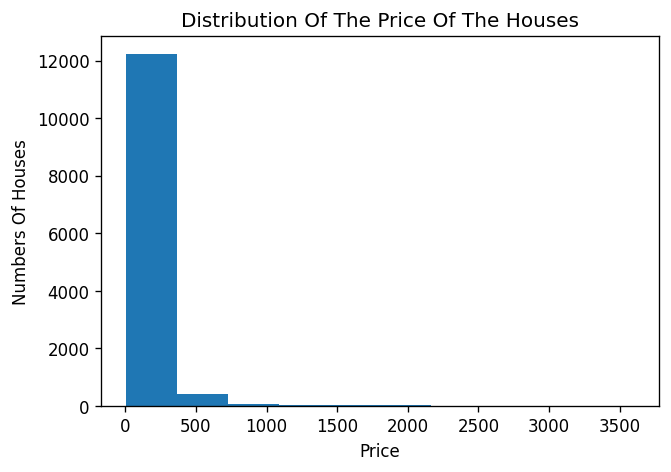

In [23]:
labelling(House_Prices.price, kind='hist', title="distribution of the Price of the houses", y = "Numbers of houses",
          x="Price", text=False);

Analyzing the provided graph reveals a distinct pattern. The graph displays a right-skewed distribution, signifying that the majority of house prices are below the 500,000-dollar threshold. However, it is evident that the price column contains some extreme outliers that must be addressed. Outliers can potentially harm the model's performance and should be handled appropriately. Before taking any action, let's examine all the houses priced above 2 million dollars.

In [24]:
House_Prices.query("price>2000")

,area_type,location,size,total_sqft,bath,balcony,price,Home_availability,Home_availabilty_month
408,Super built-up Area,Rajaji Nagar,7,12000,6.0,3.0,2200.0,Date Given,Jan
605,Super built-up Area,Malleshwaram,7,12000,7.0,3.0,2200.0,Date Given,Jan
2623,Plot Area,Dodsworth Layout,4,30000,4.0,2.0,2100.0,Date Given,Jul
3180,Super built-up Area,Shanthala Nagar,5,8321,5.0,3.0,2700.0,Ready To Move,Tbd
4162,Built-up Area,Yemlur,4,7000,5.0,2.0,2050.0,Ready To Move,Tbd
6421,Plot Area,Bommenahalli,4,2940,3.0,2.0,2250.0,Date Given,Sep
10304,Plot Area,5th Block Jayanagar,4,10624,4.0,2.0,2340.0,Ready To Move,Tbd
11080,Super built-up Area,Ashok Nagar,4,8321,5.0,2.0,2912.0,Date Given,Jan
11763,Plot Area,Sadashiva Nagar,5,9600,7.0,2.0,2736.0,Ready To Move,Tbd
12443,Plot Area,Dollars Colony,4,4350,8.0,2.0,2600.0,Ready To Move,Tbd


Upon closer examination, it becomes evident that the rows in question may not be outliers, as they demonstrate substantial values for key attributes such as `size`, `total_sqft`, and `bath.` These values suggest that these data points may not be anomalous after all. In light of this observation, let's shift our focus to exploring the distribution of `area_type` among the houses. This will provide us with valuable insights into the different types of areas represented in the dataset and their respective characteristics.

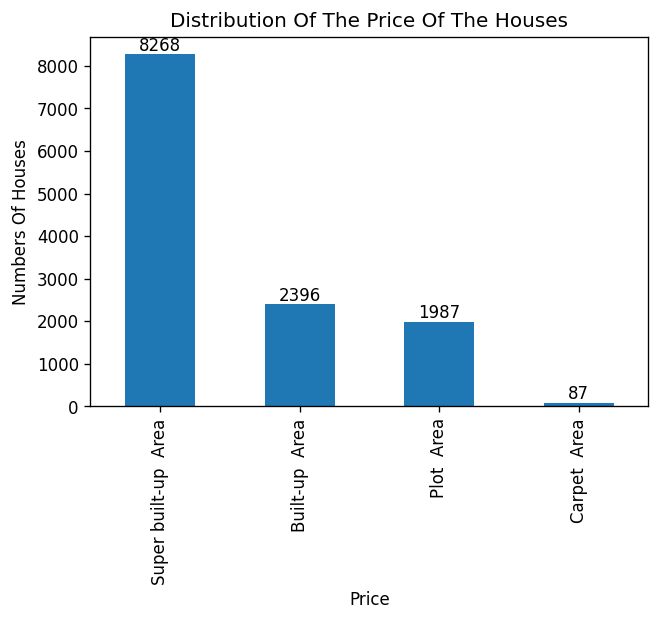

In [25]:
labelling(House_Prices.area_type.value_counts(), kind='bar', title="distribution of the Price of the houses", y = "Numbers of houses",
          x="Price", text=True);

Upon initial observation, it is evident that a substantial number of houses are situated in the `super built-up area.`This might indicate that the `super built-up areas` are located in commercial areas hence the high demand. This observation prompts us to delve deeper and investigate whether the geographical location of a house plays a significant role in determining its price.

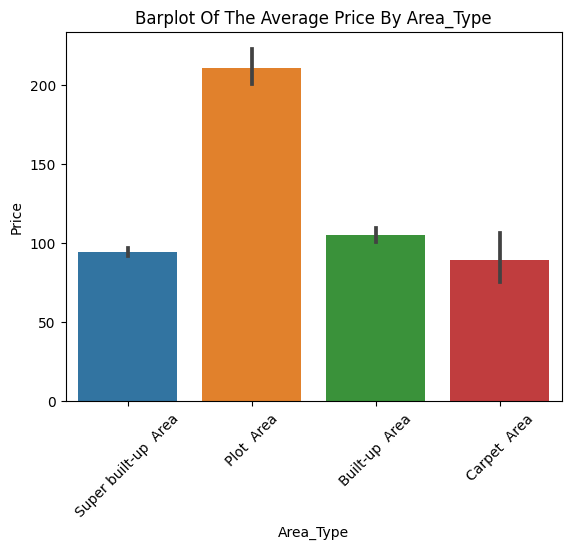

In [26]:
# Creating a barplot showing the price range per area_type
sns.barplot(x='area_type', y='price', data=House_Prices)
plt.xticks(rotation=45)
labelling('', title='Barplot of the average price by area_type', y = 'Price', x='Area_Type', text=False, draw=False);

In our analysis, we have observed a noticeable impact of the property's location on its price. It is evident that the number of houses in a particular location significantly influences the property prices. <br>
Another noteworthy observation emerges regarding the relationship between the area_type of properties and their respective average prices. Specifically, properties with a `Plot Area` designation exhibit the highest average price, significantly surpassing the average prices of other `area_type` categories.

Given these initial insights, it would be beneficial to delve deeper into the relationship between area_type and other relevant factors, such as size.

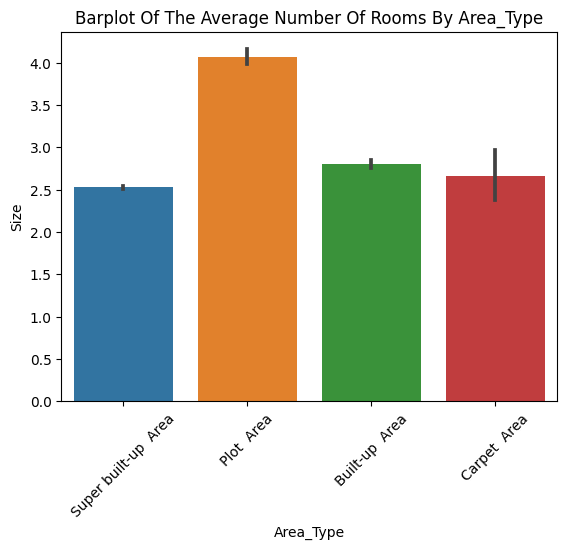

In [27]:
# Creating the barplot showing the number of rooms range per area_type
sns.barplot(x='area_type', y='size', data=House_Prices)
plt.xticks(rotation=45)
labelling('', title='Barplot of the average number of rooms by area_type', y = 'Size', x='Area_Type', text=False, draw=False);

Observing the graph above, it's intriguing to note that the average number of rooms is actually highest among properties designated as `Plot Area.` This unexpected finding prompts us to delve deeper into the relationship between the `area_type` variable and `total_sqft,` as it may offer valuable insights into property sizes and configurations across different area types.

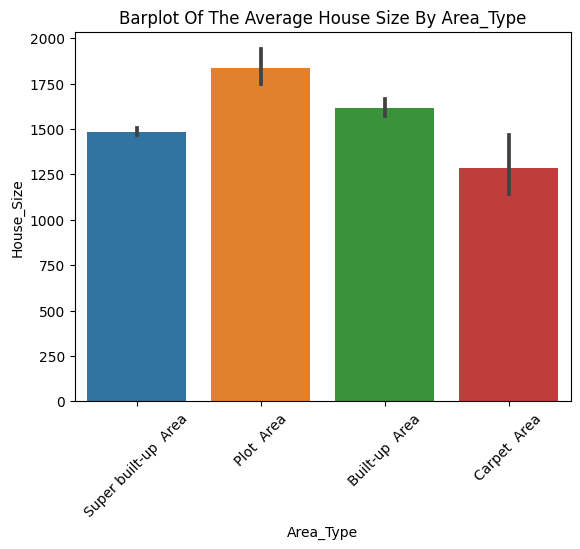

In [28]:
# creating the barplot showing the average house size range per area_type
sns.barplot(x='area_type', y='total_sqft', data=House_Prices)
plt.xticks(rotation=45)
labelling('', title='Barplot of the average house size by area_type', y = 'House_Size', x='Area_Type', text=False, draw=False);

From the graph above, we can see that the average house size is the highest among properties with a `Plot Area` designation. This data suggests that individuals interested in purchasing a house in a `Plot Area` will, on average, enjoy more rooms and a larger living space compared to other area types. However, it's important to note that this comes at a higher price than other area types.

Now, let's turn our attention to the `Home_availability` column.

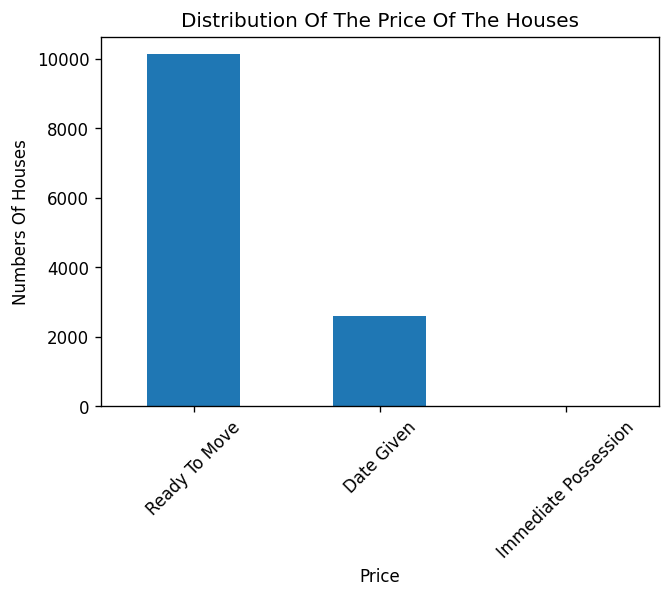

In [29]:
labelling(House_Prices.Home_availability.value_counts(), kind='bar', title="distribution of the Price of the houses", y = "Numbers of houses",
          x="Price", text=False)
plt.xticks(rotation=45);

Having observed that the majority of houses fall under the `Ready To Move` status, we will now delve deeper into the relationship between this status and the `area_type` of the properties.

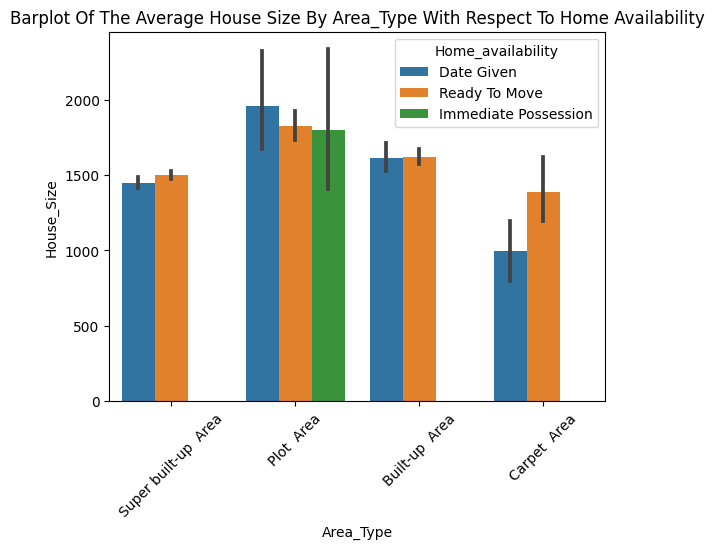

In [30]:
# creating the barplot showing the house size range per area_type with respect to Home availability
sns.barplot(x='area_type', y='total_sqft', data=House_Prices, hue='Home_availability')
plt.xticks(rotation=45)
labelling('', title='Barplot of the average house size by area_type with respect to Home availability', y = 'House_Size', x='Area_Type',
          text=False, draw=False);

Continuing our exploration from the previous analysis, we can derive further insights from the graph. Firstly, it's evident that the `immediate possession` availability option is exclusively associated with the `Plot Area` region, making it a unique feature of this area type.

Moreover, when we look at the distribution of availability options within the different area types, we notice an interesting pattern. In the case of the `Plot Area`, it stands out as the only area type where, on average, there are more properties listed as `Date Given` rather than `Ready to Move`. This observation raises questions about the relationship between availability status and price within this specific area type.

To delve deeper into this discrepancy, it would be beneficial to perform a detailed analysis of the pricing trends in the `Plot Area.` This analysis could help uncover whether the higher number of `Date Given` properties is indeed correlated with pricing factors or if there are other underlying reasons driving this trend.

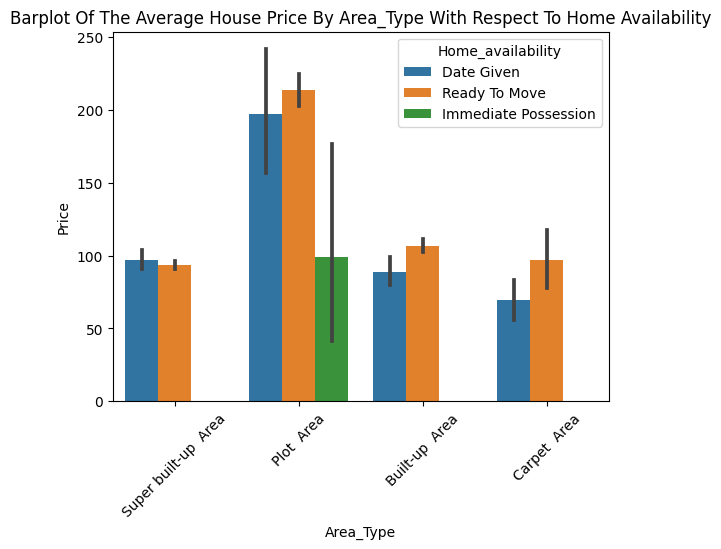

In [31]:
# creating the barplot showing the average house price per area_type with respect to Home availability
sns.barplot(x='area_type', y='price', data=House_Prices, hue='Home_availability')
plt.xticks(rotation=45)
labelling('', title='Barplot of the average house price by area_type with respect to Home availability', y = 'price', x='Area_Type',
          text=False, draw=False);

The graph above confirms what we already know; however, it reveals some interesting insights. While the average house price for a building with the `immediate possession` availability in the `plot area` is lower than expected, there is a significant anomaly worth exploring further.

The error line for the `immediate possession` category is unusually long, suggesting a wide variation in house prices within this category. Potential explanations for this phenomenon could include unique property characteristics, differing market dynamics, or data recording inconsistencies.


With that in mind, let's shift our gaze to the `Home_availabilty_month`. While we continue our exploration of the dataset, it's important to acknowledge that our analysis may not delve deeply into certain aspects due to the presence of numerous imputed values within the column. Relying heavily on imputed values can introduce variability and uncertainty into our analysis.

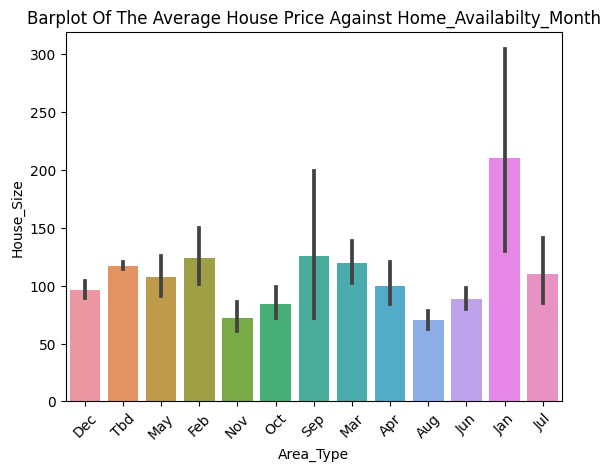

In [32]:
# creating the barplot showing the average house price against Home_availabilty_month
sns.barplot(x='Home_availabilty_month', y='price', data=House_Prices)
plt.xticks(rotation=45)
labelling('', title='Barplot of the average house price against Home_availabilty_month', y = 'House_Size', x='Area_Type',
          text=False, draw=False);

From the graph above, we can observe that house prices exhibit some intriguing patterns across the months of the year. Notably, January stands out as the month with the highest house prices, surpassing all other months by a significant margin. This spike in January prices could be attributed to various factors, including the onset of the new year, potential demand associated with new resolutions and beginnings, or even seasonal factors.

Following in second place is September, with prices that are notably elevated as well. The influence of summer could play a role here, as it's a time when people often embark on home-buying ventures, possibly due to more favorable weather conditions or the desire to settle into a new home before the end of the year.

Another interesting observation is the presence of unusually long error lines in both January and September. These extended error lines suggest a wide variation in house prices within these particular months. This variation could stem from several factors, such as unique property characteristics, varying market dynamics, regional or seasonal effects, or even data recording inconsistencies.


In order to gain a more comprehensive understanding of this phenomenon, it is essential to acquire additional data that can help us analyze the trend more effectively. Beyond data collection, it is equally important to seek valuable insights from the people directly involved our customers. To fully grasp this phenomenon, we should actively engage with our customers and gather their feedback.

Lastly let's have a look at the `locations` columns.

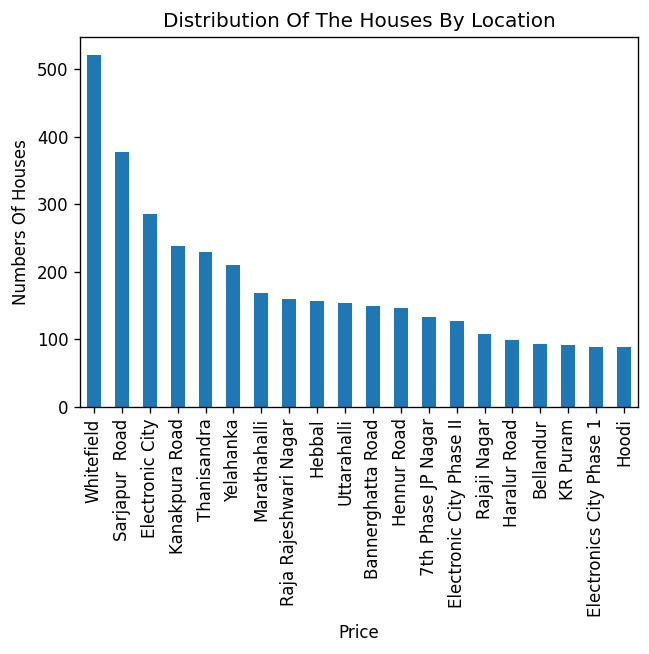

In [33]:
# Creating a bar chart ranking the top 20 locations.
labelling(House_Prices.location.value_counts()[:20], kind='bar', title="distribution of the houses by location", y = "Numbers of houses",
          x="Price", text=False)
plt.xticks(rotation=90);

Analyzing the data further, we observe that `Whitefield` is the most renowned location, closely followed by `Sarjapur Road.` However, the underlying factors driving the popularity of these locations warrant a more in-depth investigation.

The prominence of `Whitefield` and `Sarjapur Road` in the dataset raises intriguing questions. To better understand their popularity, we will need to delve into aspects not covered in our dataset, such as the presence of amenities and infrastructure, quality of life, employment opportunities, and much more.

For now, let's focus on investigating whether price plays a role.

In [34]:
# creating a dataset containing only the top 20 locations
top_20 = House_Prices.location.value_counts()[:20].index
top_20_Df = House_Prices.query("location in @top_20")
top_20_Df

,area_type,location,size,total_sqft,bath,balcony,price,Home_availability,Home_availabilty_month
0,Super built-up Area,Electronic City Phase II,2,1056,2.0,1.0,39.07,Date Given,Dec
2,Built-up Area,Uttarahalli,3,1440,2.0,3.0,62.00,Ready To Move,Tbd
5,Super built-up Area,Whitefield,2,1170,2.0,1.0,38.00,Ready To Move,Tbd
7,Super built-up Area,Rajaji Nagar,4,3300,4.0,2.0,600.00,Ready To Move,Tbd
8,Super built-up Area,Marathahalli,3,1310,3.0,1.0,63.25,Ready To Move,Tbd
...,...,...,...,...,...,...,...,...,...
13304,Super built-up Area,Raja Rajeshwari Nagar,2,1187,2.0,2.0,40.14,Ready To Move,Tbd
13308,Built-up Area,Bannerghatta Road,3,1527,3.0,1.0,142.00,Ready To Move,Tbd
13312,Super built-up Area,Bellandur,2,1262,2.0,2.0,47.00,Ready To Move,Tbd
13315,Built-up Area,Whitefield,5,3453,4.0,0.0,231.00,Ready To Move,Tbd


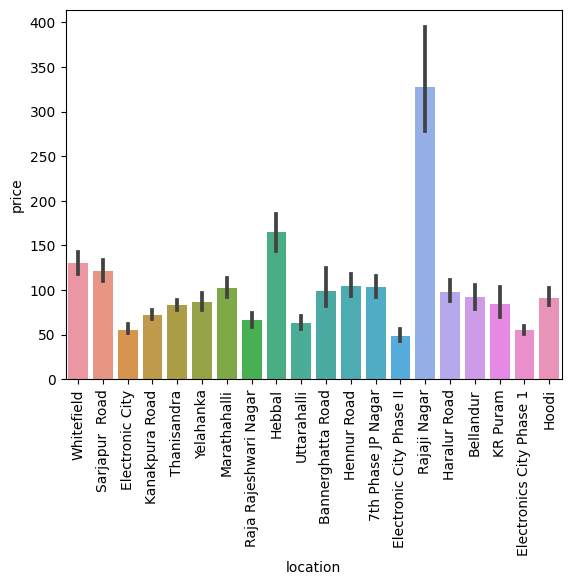

In [35]:
sns.barplot(x='location', y='price', data=top_20_Df, order=top_20)
plt.xticks(rotation=90);
# labelling('', title='Barplot of the average house price per location', y = 'House_Size', x='Area_Type',
#           text=False, draw=False);

The graph above appears to provide limited insights. Notably, the average house price in the `Rajaji Nagar` region stands out as exceptionally high. While this may be attributed to factors such as the quality of life or the availability of social amenities in the area, it is important to acknowledge that definitive conclusions cannot be drawn at this stage.

Now let's have a look at the dataframe and how all the columns correlate to our target variable

<ipython-input-36-a630f871598a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(House_Prices.corr());


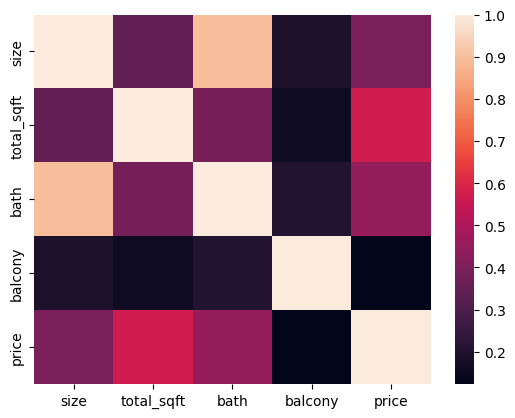

In [36]:
sns.heatmap(House_Prices.corr());

In the current analysis, it has been observed that most of the columns exhibit weak correlations with the target variable. This finding suggests that preprocessing steps may be necessary to enhance the relationship between the features and the target. These preprocessing techniques and strategies will be addressed in the upcoming notebook.

# Conclusion

In conclusion, our analysis has unearthed substantial insights from the dataset, culminating in the following confident findings:

1. Buyers interested in `Plot Area` properties can anticipate more expansive living spaces with a higher room count compared to other area types.

2. The dataset predominantly showcases houses located in the `super built-up area`.

3. A significant majority of house prices fall below the $500,000 threshold.

4. The availability of immediate possession is exclusively linked to the `Plot Area` region, setting it apart as a distinctive feature within this category.

5. January emerges as the standout month with the highest house purchase prices, surpassing all other months by a significant margin.

6. Furthermore, our analysis has revealed that many dataset columns exhibit weak correlations with the target variable. This underscores the imperative need for further data preprocessing and meticulous feature engineering to optimize model performance.

In summary, our analysis represents a pivotal milestone in our data-driven journey. It lays the foundation for an in-depth exploration and advanced model development, enhancing our grasp of the intricate factors influencing property prices.

# Limitations

Our analysis, while providing valuable insights into the dataset's relationship with the target variable, does acknowledge certain areas in need of improvement:

1. The absence of critical columns in the dataset has limited our ability to gain a comprehensive understanding of the factors influencing price. Factors such as the presence of amenities, infrastructure, or proximity to commercial areas could significantly enhance our analysis.

2. The dataset's small size and a high prevalence of missing values have posed challenges that have, in turn, impacted the depth of our analysis.

# Saving of Cleaned Dataframe

In [37]:
House_Prices.to_csv("./data/Cleaned_House_Prices.csv", index=False)